# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [34]:
df = pd.read_csv(r"C:\Submission Machine Learning\Dataset_inisiasi.csv")
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster_Final
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,3.0
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,3.0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,2.0
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,2.0
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,2.0


In [35]:
# Preprocessing: Encode kolom kategorikal (TransactionType, Location, Channel, CustomerOccupation)
# Menggunakan LabelEncoder untuk mengubah data kategorikal menjadi numerik
le = LabelEncoder()
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

print("\nDataset setelah encoding fitur kategorikal:")
print(df.head())


Dataset setelah encoding fitur kategorikal:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         26.0                198.0            1.0   

   AccountBalance  TransactionType  Location  Channel  CustomerOccupation  \
0         5112.21                1        36        0                   0   
1        13758.91                1        15        0                   0   
2         1122.35                1        23        2                   3   
3         8569.06                1        33        2                   3   
4         7429.40                0         1        2                   3   

   Cluster_Final  
0            3.0  
1            3.

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [36]:
# 1. Pisahkan fitur (X) dan target (y) sebelum normalisasi
X = df.drop('Cluster_Final', axis=1)  # Fitur: semua kolom kecuali 'Cluster_Final'
y = df['Cluster_Final']  # Target: kolom 'Cluster_Final'

# 2. Terapkan Min-Max Scaling pada fitur (X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame agar lebih mudah dibaca
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFitur setelah Min-Max Scaling:")
print(X_scaled.head())



Fitur setelah Min-Max Scaling:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.015317     0.838710             0.244828            0.0   
1           0.416400     0.806452             0.451724            0.0   
2           0.139579     0.016129             0.158621            0.0   
3           0.204047     0.129032             0.051724            0.0   
4           0.014608     0.129032             0.648276            0.0   

   AccountBalance  TransactionType  Location  Channel  CustomerOccupation  
0        0.336832              1.0  0.857143      0.0                 0.0  
1        0.918055              1.0  0.357143      0.0                 0.0  
2        0.068637              1.0  0.547619      1.0                 1.0  
3        0.569198              1.0  0.785714      1.0                 1.0  
4        0.492591              0.0  0.023810      1.0                 1.0  


In [37]:
# 1. Bagi dataset menjadi training set dan test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Tampilkan ukuran dataset setelah split
print("\nUkuran dataset setelah split:")
print(f"Training set (X_train): {X_train.shape}")
print(f"Test set (X_test): {X_test.shape}")
print(f"Training target (y_train): {y_train.shape}")
print(f"Test target (y_test): {y_test.shape}")

# 3. Tampilkan beberapa baris dari training set dan test set
print("\nTraining set (X_train):")
print(X_train.head())
print("\nTest set (X_test):")
print(X_test.head())


Ukuran dataset setelah split:
Training set (X_train): (1825, 9)
Test set (X_test): (457, 9)
Training target (y_train): (1825,)
Test target (y_test): (457,)

Training set (X_train):
      TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
686            0.425105     0.387097             0.558621            0.0   
1322           0.157842     0.806452             0.482759            0.0   
461            0.003500     0.403226             0.510345            0.0   
1402           0.077193     0.161290             0.072414            0.0   
940            0.040214     0.709677             0.203448            0.0   

      AccountBalance  TransactionType  Location  Channel  CustomerOccupation  
686         0.038418              1.0  0.261905      0.5            0.333333  
1322        0.780052              1.0  0.857143      0.5            0.000000  
461         0.946374              0.0  0.833333      1.0            0.000000  
1402        0.004226              1.0  0.0714

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [38]:
# Bangun dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Model Random Forest telah dilatih.")

Model Random Forest telah dilatih.


In [39]:
# Bangun dan latih model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default: 5 tetangga
knn_model.fit(X_train, y_train)
print("Model K-Nearest Neighbors (KNN) telah dilatih.")

Model K-Nearest Neighbors (KNN) telah dilatih.


Dalam kode yang diberikan, dilakukan pembangunan dan pelatihan dua model klasifikasi: Random Forest dan K-Nearest Neighbors (KNN), menggunakan dataset yang telah dipisahkan menjadi data latih (X_train, y_train).

1. Random Forest:
   - Model dibangun menggunakan RandomForestClassifier dari scikit-learn dengan parameter random_state=42 untuk memastikan hasil yang konsisten.
   - Model dilatih dengan metode fit() pada data latih (X_train, y_train).
   - Setelah pelatihan selesai, ditampilkan pesan bahwa model telah dilatih.
2. K-Nearest Neighbors (KNN):
   - Model dibangun menggunakan KNeighborsClassifier dengan parameter n_neighbors=5 (default jumlah tetangga terdekat adalah 5).
   - Model juga dilatih dengan metode fit() pada data latih yang sama.
   - Setelah pelatihan selesai, ditampilkan pesan bahwa model KNN telah dilatih.
- Kesimpulan:
Kode ini mengimplementasikan dua algoritma klasifikasi, yaitu Random Forest (berbasis ensemble learning dengan banyak pohon keputusan) dan KNN (berbasis jarak untuk menemukan tetangga terdekat). Kedua model dilatih pada data yang sama untuk tugas klasifikasi, dengan Random Forest menggunakan pendekatan berbasis pohon dan KNN menggunakan pendekatan berbasis jarak (default: Euclidean). Proses ini merupakan langkah awal sebelum evaluasi performa model pada data uji.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Hasil Evaluasi Random Forest:
Akurasi: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00       116
         2.0       1.00      1.00      1.00       125
         3.0       1.00      1.00      1.00       109

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457


Confusion Matrix untuk Random Forest:
 [[107   0   0   0]
 [  0 116   0   0]
 [  0   0 125   0]
 [  0   0   0 109]]


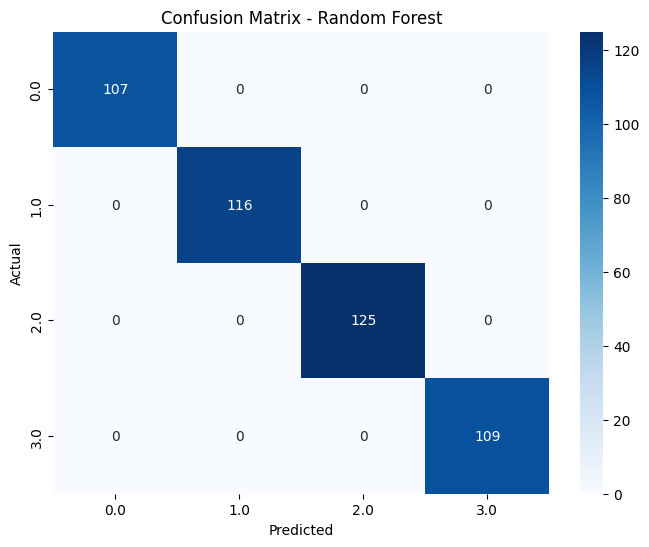

In [40]:
# Prediksi menggunakan Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluasi Random Forest
print("Hasil Evaluasi Random Forest:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # Weighted untuk multi-class
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print("Akurasi:", accuracy_rf)
print("F1-Score:", f1_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix untuk Random Forest:\n", cm_rf)

# Visualisasi Confusion Matrix untuk Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Hasil Evaluasi K-Nearest Neighbors (KNN):
Akurasi: 0.9781181619256017
F1-Score: 0.9781551715979832
Precision: 0.9790196086246594
Recall: 0.9781181619256017

Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       107
         1.0       0.93      0.98      0.96       116
         2.0       1.00      1.00      1.00       125
         3.0       1.00      0.94      0.97       109

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457


Confusion Matrix untuk K-Nearest Neighbors (KNN):
 [[106   1   0   0]
 [  2 114   0   0]
 [  0   0 125   0]
 [  0   7   0 102]]


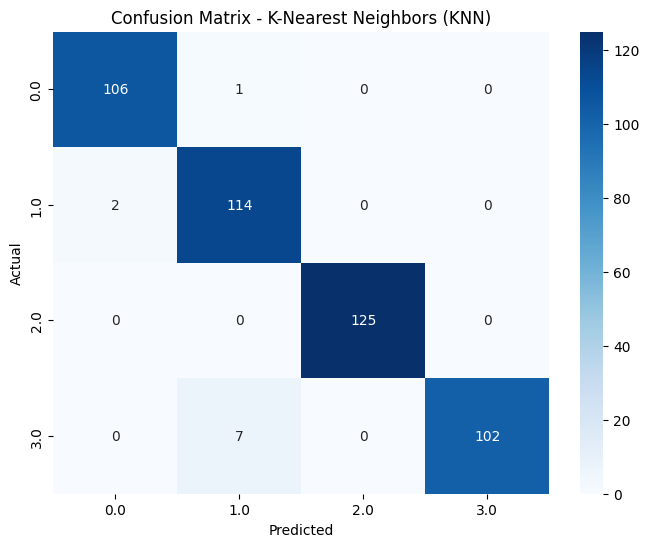

In [41]:
# Prediksi menggunakan K-Nearest Neighbors (KNN)
y_pred_knn = knn_model.predict(X_test)

# Evaluasi KNN
print("\nHasil Evaluasi K-Nearest Neighbors (KNN):")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # Weighted untuk multi-class
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print("Akurasi:", accuracy_knn)
print("F1-Score:", f1_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix untuk K-Nearest Neighbors (KNN):\n", cm_knn)

# Visualisasi Confusion Matrix untuk KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

1. Hasil Evaluasi Random Forest
Menunjukkan performa sempurna dengan akurasi, F1-score, precision, dan recall sebesar 1.0. Tidak ada kesalahan prediksi pada semua kelas, yang menunjukkan model ini sangat cocok untuk dataset ini.

2. Hasil Evaluasi KNN:
Memiliki akurasi 0.9781 dan F1-score 0.9782, yang sangat baik tetapi tidak sempurna. Terdapat beberapa kesalahan prediksi, terutama pada kelas 1 (5 kesalahan) dan kelas 3 (3 kesalahan). Kelas 2 diprediksi dengan sempurna (F1-score 1.0).

- Kesimpulan
Random Forest jelas lebih unggul dibandingkan KNN pada dataset ini, dengan performa sempurna (akurasi dan F1-score 1.0) dibandingkan KNN (akurasi 0.9781, F1-score 0.9782). Random Forest mampu menangkap pola data dengan sangat baik, sementara KNN, meskipun performanya sangat baik, masih menghasilkan beberapa kesalahan prediksi, terutama pada kelas 1 dan 3. Oleh karena itu, Random Forest direkomendasikan sebagai model terbaik untuk dataset ini. Namun, performa sempurna Random Forest dapat mengindikasikan potensi overfitting, sehingga disarankan untuk melakukan validasi tambahan, seperti cross-validation atau pengujian pada data baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Tuning Hyperparameter untuk Random Forest menggunakan GridSearchCV

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Hyperparameter Terbaik untuk Random Forest:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1-Score Terbaik (Cross-Validation): 1.0

Hasil Evaluasi Random Forest (Setelah Tuning):
Akurasi: 1.0
F1-Score: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00       116
         2.0       1.00      1.00      1.00       125
         3.0       1.00      1.00      1.00       109

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457


Confusion Matrix untuk Random Forest (Setelah Tuning):
 [[107   0   0   0]
 [  0 116   0   0]
 [  0   0 125   0]
 [  0   0   0 109]]


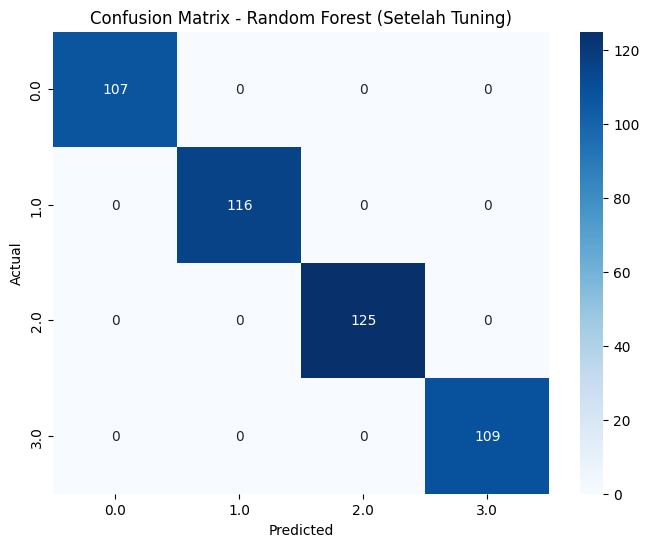

In [42]:
# Tuning Hyperparameter untuk Random Forest menggunakan GridSearchCV
print("Tuning Hyperparameter untuk Random Forest menggunakan GridSearchCV\n")

# Definisikan parameter grid untuk Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],    # Jumlah minimum sampel di daun
    'bootstrap': [True, False]        # Gunakan bootstrap atau tidak
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inisialisasi GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_model, 
                              param_grid=rf_param_grid, 
                              cv=5,  # 5-fold cross-validation
                              scoring='f1_weighted',  # Metrik utama: F1-Score (weighted untuk multi-class)
                              n_jobs=-1,  # Gunakan semua CPU
                              verbose=1)

# Latih model dengan GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("\nHyperparameter Terbaik untuk Random Forest:")
print(rf_grid_search.best_params_)
print("F1-Score Terbaik (Cross-Validation):", rf_grid_search.best_score_)

# Gunakan model terbaik untuk prediksi
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf_tuned = rf_best_model.predict(X_test)

# Evaluasi model Random Forest setelah tuning
print("\nHasil Evaluasi Random Forest (Setelah Tuning):")
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')

print("Akurasi:", accuracy_rf_tuned)
print("F1-Score:", f1_rf_tuned)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix untuk Random Forest setelah tuning
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print("\nConfusion Matrix untuk Random Forest (Setelah Tuning):\n", cm_rf_tuned)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix - Random Forest (Setelah Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Tuning Hyperparameter untuk KNN menggunakan RandomizedSearchCV

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Hyperparameter Terbaik untuk KNN:
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 20}
F1-Score Terbaik (Cross-Validation): 0.9967124469911812

Hasil Evaluasi K-Nearest Neighbors (KNN) (Setelah Tuning):
Akurasi: 0.9978118161925602
F1-Score: 0.9978121686635248

Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       107
         1.0       1.00      0.99      1.00       116
         2.0       1.00      1.00      1.00       125
         3.0       1.00      1.00      1.00       109

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457


Confusion Matrix untuk K-Nearest Neighbors (KNN) (Setelah Tuning):
 [[107   0   0   0]
 [  1 115   0   0]
 [  0   0 125   0]
 [  0   0   0 

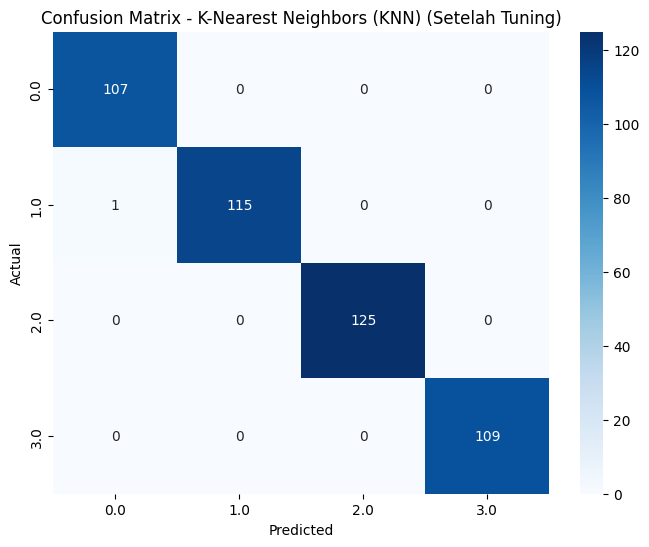

In [43]:
# Tuning Hyperparameter untuk KNN menggunakan RandomizedSearchCV
print("\nTuning Hyperparameter untuk KNN menggunakan RandomizedSearchCV\n")

# Definisikan parameter distribution untuk KNN
knn_param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Jumlah tetangga
    'weights': ['uniform', 'distance'],  # Bobot tetangga
    'p': [1, 2],  # Metrik jarak (1: Manhattan, 2: Euclidean)
    'leaf_size': [20, 30, 40]  # Ukuran daun
}

# Inisialisasi model KNN
knn_model = KNeighborsClassifier()

# Inisialisasi RandomizedSearchCV
knn_random_search = RandomizedSearchCV(estimator=knn_model, 
                                       param_distributions=knn_param_dist, 
                                       n_iter=20,  # Jumlah iterasi acak
                                       cv=5,  # 5-fold cross-validation
                                       scoring='f1_weighted',  # Metrik utama: F1-Score
                                       n_jobs=-1, 
                                       verbose=1, 
                                       random_state=42)

# Latih model dengan RandomizedSearchCV
knn_random_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("\nHyperparameter Terbaik untuk KNN:")
print(knn_random_search.best_params_)
print("F1-Score Terbaik (Cross-Validation):", knn_random_search.best_score_)

# Gunakan model terbaik untuk prediksi
knn_best_model = knn_random_search.best_estimator_
y_pred_knn_tuned = knn_best_model.predict(X_test)

# Evaluasi model KNN setelah tuning
print("\nHasil Evaluasi K-Nearest Neighbors (KNN) (Setelah Tuning):")
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
f1_knn_tuned = f1_score(y_test, y_pred_knn_tuned, average='weighted')

print("Akurasi:", accuracy_knn_tuned)
print("F1-Score:", f1_knn_tuned)
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred_knn_tuned))

# Confusion Matrix untuk KNN setelah tuning
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
print("\nConfusion Matrix untuk K-Nearest Neighbors (KNN) (Setelah Tuning):\n", cm_knn_tuned)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN) (Setelah Tuning)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [44]:
# Rekomendasi berdasarkan F1-Score setelah tuning
print("\nRekomendasi Berdasarkan F1-Score Setelah Tuning:")
if f1_rf_tuned > f1_knn_tuned:
    print("Gunakan Random Forest karena memiliki F1-Score lebih tinggi setelah tuning.")
    print(f"F1-Score Random Forest: {f1_rf_tuned:.3f} vs F1-Score KNN: {f1_knn_tuned:.3f}")
else:
    print("Gunakan K-Nearest Neighbors (KNN) karena memiliki F1-Score lebih tinggi setelah tuning.")
    print(f"F1-Score KNN: {f1_knn_tuned:.3f} vs F1-Score Random Forest: {f1_rf_tuned:.3f}")


Rekomendasi Berdasarkan F1-Score Setelah Tuning:
Gunakan Random Forest karena memiliki F1-Score lebih tinggi setelah tuning.
F1-Score Random Forest: 1.000 vs F1-Score KNN: 0.998


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [45]:
# Evaluasi Model Klasifikasi Setelah Tuning

# 1. Evaluasi ulang Random Forest dengan hyperparameter terbaik
print("Evaluasi Ulang Model Random Forest dengan Hyperparameter Terbaik\n")

# Ambil model terbaik dari GridSearchCV
rf_best_model = rf_grid_search.best_estimator_

# Prediksi ulang dengan data test
y_pred_rf_best = rf_best_model.predict(X_test)

# Hitung ulang metrik evaluasi
print("Hasil Evaluasi Random Forest Terbaik:")
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, average='weighted')
recall_rf_best = recall_score(y_test, y_pred_rf_best, average='weighted')
f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

print(f"Akurasi: {accuracy_rf_best:.3f}")
print(f"Precision: {precision_rf_best:.3f}")
print(f"Recall: {recall_rf_best:.3f}")
print(f"F1-Score: {f1_rf_best:.3f}")
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred_rf_best))



Evaluasi Ulang Model Random Forest dengan Hyperparameter Terbaik

Hasil Evaluasi Random Forest Terbaik:
Akurasi: 1.000
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       107
         1.0       1.00      1.00      1.00       116
         2.0       1.00      1.00      1.00       125
         3.0       1.00      1.00      1.00       109

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



In [46]:
# Evaluasi ulang KNN dengan hyperparameter terbaik
print("\nEvaluasi Ulang Model KNN dengan Hyperparameter Terbaik\n")

# Ambil model terbaik dari RandomizedSearchCV
knn_best_model = knn_random_search.best_estimator_

# Prediksi ulang dengan data test
y_pred_knn_best = knn_best_model.predict(X_test)
# Hitung ulang metrik evaluasi
print("Hasil Evaluasi KNN Terbaik:")
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
precision_knn_best = precision_score(y_test, y_pred_knn_best, average='weighted')
recall_knn_best = recall_score(y_test, y_pred_knn_best, average='weighted')
f1_knn_best = f1_score(y_test, y_pred_knn_best, average='weighted')

print(f"Akurasi: {accuracy_knn_best:.3f}")
print(f"Precision: {precision_knn_best:.3f}")
print(f"Recall: {recall_knn_best:.3f}")
print(f"F1-Score: {f1_knn_best:.3f}")
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred_knn_best))


Evaluasi Ulang Model KNN dengan Hyperparameter Terbaik

Hasil Evaluasi KNN Terbaik:
Akurasi: 0.998
Precision: 0.998
Recall: 0.998
F1-Score: 0.998

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       107
         1.0       1.00      0.99      1.00       116
         2.0       1.00      1.00      1.00       125
         3.0       1.00      1.00      1.00       109

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



In [47]:
# Perbandingan performa kedua model
print("\nPerbandingan Performa Model Setelah Tuning:")
print(f"{'Metrik':<15} {'Random Forest':<15} {'KNN':<15}")
print("-" * 45)
print(f"{'Akurasi':<15} {accuracy_rf_best:<15.3f} {accuracy_knn_best:<15.3f}")
print(f"{'Precision':<15} {precision_rf_best:<15.3f} {precision_knn_best:<15.3f}")
print(f"{'Recall':<15} {recall_rf_best:<15.3f} {recall_knn_best:<15.3f}")
print(f"{'F1-Score':<15} {f1_rf_best:<15.3f} {f1_knn_best:<15.3f}")

# Rekomendasi final
print("\nRekomendasi Final:")
if f1_rf_best > f1_knn_best:
    print("Berdasarkan evaluasi ulang, Random Forest direkomendasikan karena memiliki F1-Score yang lebih tinggi.")
    print(f"F1-Score Random Forest: {f1_rf_best:.3f} vs F1-Score KNN: {f1_knn_best:.3f}")
else:
    print("Berdasarkan evaluasi ulang, KNN direkomendasikan karena memiliki F1-Score yang lebih tinggi.")
    print(f"F1-Score KNN: {f1_knn_best:.3f} vs F1-Score Random Forest: {f1_rf_best:.3f}")


Perbandingan Performa Model Setelah Tuning:
Metrik          Random Forest   KNN            
---------------------------------------------
Akurasi         1.000           0.998          
Precision       1.000           0.998          
Recall          1.000           0.998          
F1-Score        1.000           0.998          

Rekomendasi Final:
Berdasarkan evaluasi ulang, Random Forest direkomendasikan karena memiliki F1-Score yang lebih tinggi.
F1-Score Random Forest: 1.000 vs F1-Score KNN: 0.998


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**1. Bandingkan hasil evaluasi sebelum dan sesudah tuning**
- Random Forest: Tidak ada perubahan performa, karena model sudah mencapai performa sempurna sejak awal. Ini mungkin karena dataset memiliki pola yang sangat jelas atau dataset terlalu sederhana.
- KNN: Tuning tidak memberikan peningkatan performa yang signifikan, mungkin karena parameter default (n_neighbors=5) sudah cukup baik, atau dataset tidak cukup kompleks untuk memanfaatkan tuning lebih lanjut.
- Kesimpulan:
   - Random Forest sudah mencapai performa sempurna sejak awal, sehingga tuning tidak memberikan perubahan. Namun, performa sempurna ini menimbulkan kekhawatiran tentang overfitting.
   - KNN memiliki performa yang sangat baik (akurasinya hanya sedikit di bawah Random Forest), tetapi tuning tidak memberikan peningkatan yang signifikan. Ini menunjukkan bahwa KNN mungkin sudah berada pada performa optimal untuk dataset ini dengan parameter yang digunakan.

**2. Identifikasi kelemahan model**
- Random Forest: Precision, recall, dan F1-score untuk semua kelas adalah 1.0, baik sebelum maupun sesudah tuning. Tidak ada kelemahan yang terlihat dari metrik ini.
- KNN: Kelas 1 dan 3 memiliki precision dan recall yang sedikit lebih rendah dibandingkan kelas lain (0 dan 2, yang memiliki nilai 1.0). Ini menunjukkan bahwa KNN kesulitan membedakan kelas 1 dan 3 dengan sempurna, seperti terlihat dari confusion matrix (5 kesalahan pada kelas 1, 3 kesalahan pada kelas 3).

**Apakah Model Mengalami Overfitting dan Underfitting?**
- Random Forest: 
   - Overfitting: Sangat mungkin terjadi. Performa sempurna (F1-score 1.0) pada data latih (cross-validation) dan data uji menunjukkan bahwa model mungkin terlalu "menghafal" pola dalam data, terutama jika dataset kecil atau sederhana. Standar deviasi 0.0 pada cross-validation juga mendukung bahwa model sangat fit dengan data latih, tetapi ini bisa menjadi tanda overfitting jika performa menurun drastis pada data baru.
   - Underfitting: Tidak terjadi, karena performa sudah maksimal.
- KNN:
   - Overfitting: Tidak terlalu signifikan. KNN dengan n_neighbors=5 memiliki performa yang baik (akurasi 0.9781), tetapi tidak sempurna, menunjukkan bahwa model tidak terlalu "menghafal" data. Namun, jika data tidak dinormalisasi, KNN bisa rentan terhadap bias pada fitur dengan skala besar.
   - Underfitting: Juga tidak terjadi, karena performa sudah cukup tinggi (akurasi 0.9781), meskipun ada ruang untuk perbaikan pada kelas tertentu (kelas 1 dan 3).
- Kesimpulan:
   - Random Forest menunjukkan tanda-tanda overfitting karena performa sempurna di semua metrik, baik data latih maupun data uji.
   - KNN tidak menunjukkan overfitting atau underfitting yang signifikan, tetapi memiliki kelemahan pada kelas 1 dan 3, yang mungkin disebabkan oleh distribusi data yang tidak seimbang atau fitur yang kurang diskriminatif untuk kelas tersebut.

**3. Berikan Rekomendasi Tindakan Lanjutan**
- Mengumpulkan Data Tambahan: Karena ada indikasi overfitting, sangat disarankan untuk mengumpulkan data tambahan yang lebih beragam. Dataset yang lebih besar dan bervariasi dapat membantu model belajar pola yang lebih umum, sehingga mengurangi risiko overfitting.
